In [2]:
import requests
from requests import Session
from requests.exceptions import HTTPError
import pprint
import json
import time
import pandas as pd
from random import uniform
import seaborn as sns

In [3]:
pp = pprint.PrettyPrinter(indent=4)

In [4]:
try:
    response = requests.get('https://statsapi.mlb.com/api/v1/teams?sportId=1')
    response.raise_for_status()
    
    # access JSON content
    jsonResponse = response.json()
    #for k,v in jsonResponse.items():
        #print(k)
    #pp.pprint(jsonResponse)
    #pp.pprint(jsonResponse["playsByInning"])
    #pp.pprint(jsonResponse["allPlays"][0])
    #pp.pprint(jsonResponse["allPlays"][0]["playEvents"][3])
    
    
    for teams in jsonResponse["teams"]:
        pp.pprint(f"{teams['name']} - {teams['id']}")
    #    if plays["isPitch"] == True:
    #        pp.pprint(plays['count'])
    #        pp.pprint(plays['pitchNumber'])
    #        pp.pprint(plays['details'])
    #        pp.pprint(plays['pitchData'])

except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')
except Exception as err:
    print(f'Other error occurred: {err}')

'Los Angeles Angels - 108'
'Arizona Diamondbacks - 109'
'Baltimore Orioles - 110'
'Boston Red Sox - 111'
'Chicago Cubs - 112'
'Cincinnati Reds - 113'
'Cleveland Indians - 114'
'Colorado Rockies - 115'
'Detroit Tigers - 116'
'Houston Astros - 117'
'Kansas City Royals - 118'
'Los Angeles Dodgers - 119'
'Washington Nationals - 120'
'New York Mets - 121'
'Oakland Athletics - 133'
'Pittsburgh Pirates - 134'
'San Diego Padres - 135'
'Seattle Mariners - 136'
'San Francisco Giants - 137'
'St. Louis Cardinals - 138'
'Tampa Bay Rays - 139'
'Texas Rangers - 140'
'Toronto Blue Jays - 141'
'Minnesota Twins - 142'
'Philadelphia Phillies - 143'
'Atlanta Braves - 144'
'Chicago White Sox - 145'
'Miami Marlins - 146'
'New York Yankees - 147'
'Milwaukee Brewers - 158'


In [75]:
try:
    response = requests.get('https://statsapi.mlb.com/api/v1/game/565896/playByPlay')
    #response = requests.get('https://statsapi.mlb.com/api/v1/game/446877/playByPlay')
    
    response.raise_for_status()
    
    # access JSON content
    jsonResponse = response.json()
    pp.pprint(jsonResponse["allPlays"][1])


except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')
except Exception as err:
    print(f'Other error occurred: {err}')

{   'about': {   'atBatIndex': 1,
                 'captivatingIndex': 33,
                 'endTime': '2019-03-30T17:07:53.215Z',
                 'halfInning': 'top',
                 'hasOut': False,
                 'hasReview': False,
                 'inning': 1,
                 'isComplete': True,
                 'isScoringPlay': False,
                 'isTopInning': True,
                 'startTime': '2019-03-30T17:06:31.701Z'},
    'actionIndex': [],
    'atBatIndex': 1,
    'count': {'balls': 1, 'outs': 1, 'strikes': 1},
    'matchup': {   'batSide': {'code': 'R', 'description': 'Right'},
                   'batter': {   'fullName': 'Pete Alonso',
                                 'id': 624413,
                                 'link': '/api/v1/people/624413'},
                   'batterHotColdZones': [],
                   'pitchHand': {'code': 'R', 'description': 'Right'},
                   'pitcher': {   'fullName': 'Stephen Strasburg',
                                 

In [23]:
try:
    response = requests.get('https://statsapi.mlb.com/api/v1/seasons?sportId=1')
    response.raise_for_status()
    
    # access JSON content
    jsonResponse = response.json()
    pp.pprint(jsonResponse)


except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')
except Exception as err:
    print(f'Other error occurred: {err}')



{   'copyright': 'Copyright 2020 MLB Advanced Media, L.P.  Use of any content '
                 'on this page acknowledges agreement to the terms posted here '
                 'http://gdx.mlb.com/components/copyright.txt',
    'seasons': [   {   'hasWildcard': True,
                       'postSeasonEndDate': '2020-10-28',
                       'postSeasonStartDate': '2020-09-29',
                       'preSeasonEndDate': '2020-03-24',
                       'preSeasonStartDate': '2020-02-21',
                       'regularSeasonEndDate': '2020-09-27',
                       'regularSeasonStartDate': '2020-03-26',
                       'seasonEndDate': '2020-10-28',
                       'seasonId': '2020',
                       'seasonStartDate': '2020-02-21'}]}


In [24]:
seasonStart = '2019-03-20'
seasonEnd = '2019-09-29'
seasonScheduleResponse = requests.get(f'https://statsapi.mlb.com/api/v1/schedule?sportId=1&startDate={seasonStart}&endDate={seasonEnd}')
seasonScheduleResponse.raise_for_status()

# access JSON content
jsonSeasonScheduleResponse = seasonScheduleResponse.json()
#pp.pprint(jsonSeasonScheduleResponse)

gameList = []
for date in jsonSeasonScheduleResponse['dates']:
    games = date['games']
    
    for game in games:
        if game['gameType'] == 'R':
            gameList.append(game['gamePk'])

    
print(len(gameList))
            

2472


In [28]:
# Get pertinent seasons

list_of_plays = []
seasonResponse = requests.get('https://statsapi.mlb.com/api/v1/seasons/all?sportId=1')
seasonResponse.raise_for_status()

# access JSON content
jsonSeasonResponse = seasonResponse.json()
#pp.pprint(jsonResponse)

for season in jsonSeasonResponse['seasons']:
    if int(season['seasonId']) >= 2019 and int(season['seasonId']) < 2020:
        seasonStart = season['regularSeasonStartDate']
        seasonEnd = season['regularSeasonEndDate']
    else:
        continue

    print(season['seasonId'])
        
        


2019


In [5]:
# Create a class to retry failed requests
class ResilientSession(Session):
    """
    This class is supposed to retry requests that return temporary errors.
    At this moment it supports: 500, 502, 503, 504
    """

    def request(self, method, url, **kwargs):
        counter = 0

        while True:
            counter += 1

            r = super(ResilientSession, self).request(method, url, **kwargs)

            if r.status_code in [ 500, 502, 503, 504 ]:
                delay = 10 * counter
                logging.warn("Got recoverable error [%s] from %s %s, retry #%s in %ss" % (r.status_code, method, url, counter, delay))
                time.sleep(delay)
                continue

            return r

In [6]:
# Create session object
s = ResilientSession()

In [83]:
# Get pertinent seasons
try:
    seasonResponse = s.get('https://statsapi.mlb.com/api/v1/seasons/all?sportId=1')
    seasonResponse.raise_for_status()
    
    # access JSON content
    jsonSeasonResponse = seasonResponse.json()
    #pp.pprint(jsonResponse)
    
    for season in jsonSeasonResponse['seasons']:
        if int(season['seasonId']) >= 2012 and int(season['seasonId']) < 2019:
        #if int(season['seasonId']) >= 2018 and int(season['seasonId']) < 2019:
            seasonStart = season['regularSeasonStartDate']
            seasonEnd = season['regularSeasonEndDate']
        else:
            continue
        
        print(season['seasonId'])
        
        seasonScheduleResponse = s.get(f'https://statsapi.mlb.com/api/v1/schedule?sportId=1&startDate={seasonStart}&endDate={seasonEnd}')
        seasonScheduleResponse.raise_for_status()

        # access JSON content
        jsonSeasonScheduleResponse = seasonScheduleResponse.json()
        #pp.pprint(jsonSeasonScheduleResponse)

        gameList = []
        list_of_pitches = []
        for date in jsonSeasonScheduleResponse['dates']:
            games = date['games']

            for game in games:
                if game['gameType'] == 'R':
                    gameResponse = s.get(f"https://statsapi.mlb.com/api/v1/game/{game['gamePk']}/playByPlay")
                    gameResponse.raise_for_status()

                    # access JSON content
                    jsonGameResponse = gameResponse.json()

                    # Loop through all plays in the game
                    for plays in jsonGameResponse["allPlays"]:
                        try:
                            # For the current play, get the max pitch index
                            max_pitch = max(plays.get("pitchIndex"),default=None)
                        except ValueError:
                            print(f"Pitch index error in game {game.get('gamePk')}")
                        
                        # init some variables with each loop
                        result_description = ""
                        result_rbi = ""
                        result_type = ""
                        hit_hardness = ""
                        hit_angle = ""
                        hit_speed = ""
                        hit_distance = ""
                        hit_trajectory = ""

                        # Loop through each event in a play (typically a pitch)
                        for event in plays["playEvents"]:
                            # Make sure the event is a pitch
                            if event.get("isPitch") == True \
                            and event.get('details').get('description') != 'Automatic Ball':
                                # if it is a pitch, get details of the pitch, otherwise mark as unknown
                                if event.get('details').get('type'):
                                    pitchType = event.get('details').get('type').get('description')
                                else:
                                    pitchType = 'unknown'
                                
                                # if it is the last pitch in the play get additional details
                                if max_pitch == event.get("index"):
                                    # Get results of the play
                                    result_description = plays["result"].get('event')
                                    result_rbi = plays["result"].get('rbi')
                                    result_type = plays["result"].get('type')
                                    
                                    # If hitData exists, grab it
                                    if 'hitData' in event:
                                        hit_hardness = event['hitData'].get('hardness')
                                        hit_angle = event['hitData'].get('launchAngle')
                                        hit_speed = event['hitData'].get('launchSpeed')
                                        hit_distance = event['hitData'].get('totalDistance')
                                        hit_trajectory = event['hitData'].get('trajectory')
                                
                                
                                #'pitch_type': event['details']['type'].get('description'),
                                #'break_angle': event['pitchData']['breaks'].get('breakAngle'),
                                 #'extension': event['pitchData'].get('extension'),
                                 #'plate_time': event['pitchData'].get('plateTime'),
                                
                                # do a try here in case we are missing any of the keys for some reason
                                try:
                                    list_of_pitches.append(
                                        {'season':season.get('seasonId'),
                                         'game':game.get('gamePk'),
                                         'batter':plays["matchup"]["batter"].get("id"),
                                         'batSide':plays["matchup"]["batSide"].get("code"),
                                         'pitcher':plays["matchup"]["pitcher"].get("id"),
                                         'pitchHand':plays["matchup"]["pitchHand"].get("code"),
                                         'count_balls': event.get('count').get('balls'),
                                         'count_strikes': event.get('count').get('strikes'),
                                         'pitch_result': event['details'].get('description'),
                                         'pitch_type': pitchType,
                                         'breakY': event['pitchData']['breaks'].get('breakY'),
                                         'break_length': event['pitchData']['breaks'].get('breakLength'),
                                         'spin_direction': event['pitchData']['breaks'].get('spinDirection'),
                                         'spin_rate': event['pitchData']['breaks'].get('spinRate'),
                                         'end_speed': event['pitchData'].get('endSpeed'),
                                         'nasty_factor': event['pitchData'].get('nastyFactor'),
                                         'start_speed': event['pitchData'].get('startSpeed'),
                                         'pitch_number': event.get('pitchNumber'),
                                         # these will only have data for some pitches
                                         'result': result_description,
                                         'result_rbi': result_rbi,
                                         'result_type': result_type,
                                         'hit_hardness': hit_hardness,
                                         'hit_angle': hit_angle,
                                         'hit_speed': hit_speed,
                                         'hit_distance': hit_distance,
                                         'hit_trajectory': hit_trajectory
                                        })
                                except KeyError as key:
                                    print(f"Key error on {key} in game {game.get('gamePk')}")                                    
                                
                                # vague progress meter
                                if len(list_of_pitches) in (70000,150000,300000,550000,700000):
                                    print(f'Current length: {len(list_of_pitches)}')
                                    
            # sleep randomly just so we don't flood the api
            time.sleep(uniform(1,3))
        
        # print total size of pitches for a season
        print(f'Total length: {len(list_of_pitches)}')
        
        # Create a dataframe of pitches in a season
        df = pd.DataFrame(list_of_pitches)
        
        # save dataframe to csv
        df.to_csv(f"pitch_data_{season['seasonId']}.csv")
                                    
except HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')
except Exception as err:
    print(f'Other error occurred: {err}')
    raise


2012
Current length: 70000
Current length: 150000
Current length: 300000
Current length: 550000
Current length: 700000
Total length: 711323
2013
Current length: 70000
Current length: 150000
Current length: 300000
Current length: 550000
Current length: 700000
Total length: 721688
2014
Current length: 70000
Current length: 150000
Current length: 300000
Current length: 550000
Current length: 700000
Total length: 717417
2015
Current length: 70000
Current length: 150000
Current length: 300000
Current length: 550000
Current length: 700000
Total length: 714149
2016
Current length: 70000
Current length: 150000
Current length: 300000
Current length: 550000
Current length: 700000
Total length: 723274
2017
Current length: 70000
Current length: 150000
Current length: 300000
Current length: 550000
Current length: 700000
Total length: 732977
2018
Current length: 70000
Current length: 150000
Current length: 300000
Current length: 550000
Current length: 700000
Total length: 738219


In [84]:
df2012 = pd.read_csv('pitch_data_2012.csv')

In [85]:
df2012

,Unnamed: 0,season,game,batter,batSide,pitcher,pitchHand,count_balls,count_strikes,pitch_result,...,start_speed,pitch_number,result,result_rbi,result_type,hit_hardness,hit_angle,hit_speed,hit_distance,hit_trajectory
0,0,2012,317775,408210,L,435221,R,0,1,Called Strike,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2012,317775,408210,L,435221,R,0,1,"In play, out(s)",...,NaN,2,Groundout,0.0,atBat,medium,NaN,NaN,NaN,ground_ball
2,2,2012,317775,554429,L,435221,R,1,0,Ball,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2012,317775,554429,L,435221,R,1,0,"In play, out(s)",...,NaN,2,Groundout,0.0,atBat,medium,NaN,NaN,NaN,ground_ball
4,4,2012,317775,400085,L,435221,R,0,1,Called Strike,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711318,711318,2012,320154,514719,L,435400,R,1,0,Ball,...,96.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711319,711319,2012,320154,514719,L,435400,R,1,1,Swinging Strike,...,97.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711320,711320,2012,320154,514719,L,435400,R,1,1,"In play, out(s)",...,95.7,3,Groundout,0.0,atBat,soft,NaN,NaN,NaN,ground_ball
711321,711321,2012,320154,457803,L,435400,R,0,1,Swinging Strike,...,94.1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df2012.isnull().sum()

Unnamed: 0             0
season                 0
game                   0
batter                 0
batSide                0
pitcher                0
pitchHand              0
count_balls            0
count_strikes          0
pitch_result           0
pitch_type             0
breakY              1924
break_length        1924
spin_direction      1924
spin_rate           1924
end_speed           1924
nasty_factor        1924
start_speed         1924
pitch_number           0
result            525267
result_rbi        525266
result_type       525266
hit_hardness      578640
hit_angle         711323
hit_speed         711323
hit_distance      711323
hit_trajectory    578640
dtype: int64

In [5]:
df2018 = pd.read_csv('pitch_data_2018.csv')

In [6]:
df2018.isnull().sum()

Unnamed: 0             0
season                 0
game                   0
batter                 0
batSide                0
pitcher                0
pitchHand              0
count_balls            0
count_strikes          0
pitch_result           0
pitch_type             0
breakY              2895
break_length        2895
spin_direction      2895
spin_rate          14263
end_speed           2895
nasty_factor        2982
start_speed         2895
pitch_number           0
result            549425
result_rbi        549425
result_type       549425
hit_hardness      608995
hit_angle         620294
hit_speed         620219
hit_distance      620332
hit_trajectory    608995
dtype: int64

In [32]:
df[df['spin_rate'].isnull()]

,Unnamed: 0,season,game,batter,batSide,pitcher,pitchHand,count_balls,count_strikes,pitch_result,...,break_angle,break_length,spin_direction,spin_rate,end_speed,nasty_factor,extension,plate_time,start_speed,pitch_number
0,0,2012,317775,408210,L,435221,R,0,1,Called Strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,2012,317775,408210,L,435221,R,0,1,"In play, out(s)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2,2012,317775,554429,L,435221,R,1,0,Ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3,2012,317775,554429,L,435221,R,1,0,"In play, out(s)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,4,2012,317775,400085,L,435221,R,0,1,Called Strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707431,707431,2012,320150,467798,R,518886,R,1,3,Called Strike,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
710584,710584,2012,320161,460576,R,599819,L,1,0,Intent Ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
710585,710585,2012,320161,460576,R,599819,L,2,0,Intent Ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
710586,710586,2012,320161,460576,R,599819,L,3,0,Intent Ball,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [18]:
df[df['spin_rate'].isnull()].groupby('game').count()['rowid'].max()

12

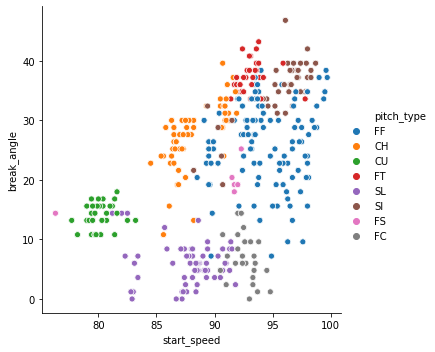

In [22]:
sns.relplot(x="start_speed",y="break_angle",hue="pitch_type",data=df)

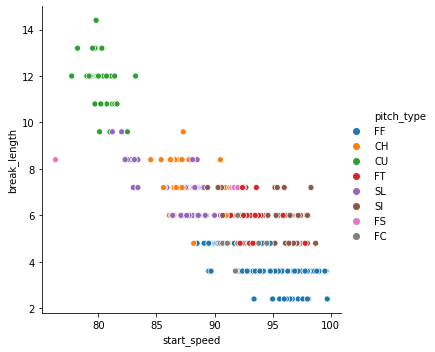

In [23]:
sns.relplot(x="start_speed",y="break_length",hue="pitch_type",data=df)

In [24]:
df['pitch_number'].max()

8

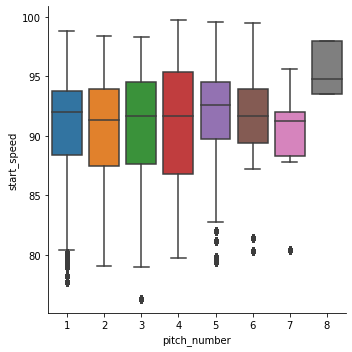

In [26]:
sns.catplot(x="pitch_number", y="start_speed", kind="box",data=df)

In [6]:
def hithardness(val):
    if val == 'soft':
        return 1
    elif val == 'medium':
        return 2
    elif val == 'hard':
        return 3

In [11]:
# Start with 2015 as then is when hit data started to become widely available
df2015 = pd.read_csv('pitch_data_2015.csv')

In [12]:
# remove records that did not have a result of a ball hit
df2015.dropna(subset=['result','hit_hardness'], inplace=True)

In [13]:
# Saved wrong, so drop an unneeded column
df2015.drop(['Unnamed: 0'], axis=1, inplace=True)

# While some of these columns may be useful for additional analysis, going to drop them for this project
df2015.drop(['season','game','batter','batSide','pitcher','pitchHand','breakY','pitch_number',
             'result_rbi', 'result_type','hit_trajectory','pitch_result','pitch_type'
            ], axis=1, inplace=True)

# Each season there are a few pitches that don't register, drop them
df2015.dropna(subset=['break_length', 'spin_direction','spin_rate',
                 'end_speed','start_speed','hit_distance','nasty_factor'], inplace=True)

df2015['count_balls'] = df2015['count_balls'].astype('category')
df2015['count_strikes'] = df2015['count_strikes'].astype('category')
df2015['hhcode'] = df2015['hit_hardness'].apply(hithardness)
df2015['hhcode'] = df2015['hhcode'].astype('category')
df2015.drop(['hit_hardness'], axis=1, inplace=True)

In [26]:
#df2015[df2015['break_length','spin_direction','spin_rate','end_speed','nasty_factor','start_speed']].corr()
df2015[['break_length','spin_direction','spin_rate','end_speed','nasty_factor','start_speed',
        'hit_angle','hit_speed','hit_distance']].corr()

,break_length,spin_direction,spin_rate,end_speed,nasty_factor,start_speed,hit_angle,hit_speed,hit_distance
break_length,1.000000,-0.273640,-0.495640,-0.808305,-0.091158,-0.818919,-0.109645,-0.078881,-0.095246
spin_direction,-0.273640,1.000000,0.129206,0.268464,0.070102,0.276340,-0.007397,0.037414,0.003471
spin_rate,-0.495640,0.129206,1.000000,0.469864,0.132352,0.519695,0.060446,0.069963,0.055989
end_speed,-0.808305,0.268464,0.469864,1.000000,0.110072,0.988284,0.002746,0.087888,0.017848
nasty_factor,-0.091158,0.070102,0.132352,0.110072,1.000000,0.116654,-0.061801,-0.133473,-0.085353
start_speed,-0.818919,0.276340,0.519695,0.988284,0.116654,1.000000,0.011329,0.089196,0.024702
hit_angle,-0.109645,-0.007397,0.060446,0.002746,-0.061801,0.011329,1.000000,0.147045,0.667522
hit_speed,-0.078881,0.037414,0.069963,0.087888,-0.133473,0.089196,0.147045,1.000000,0.443144
hit_distance,-0.095246,0.003471,0.055989,0.017848,-0.085353,0.024702,0.667522,0.443144,1.000000


In [19]:
df2015

,count_balls,count_strikes,break_length,spin_direction,spin_rate,end_speed,nasty_factor,start_speed,result,hit_angle,hit_speed,hit_distance,hhcode
20,1,0,6.0,167.0,1307.0,80.7,18.14,87.5,Double,24.21,73.53,209.00,1
33,2,1,7.2,144.0,845.0,80.7,32.93,87.5,Groundout,-12.85,96.46,12.23,2
54,0,0,6.0,177.0,1012.0,80.9,46.86,87.5,Single,13.41,83.62,234.12,2
58,2,0,4.8,159.0,1486.0,80.8,34.86,87.2,Double,24.57,85.00,259.69,2
67,0,1,4.8,190.0,1675.0,81.8,38.88,89.2,Flyout,30.92,99.23,364.35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714127,0,0,7.2,204.0,943.0,76.9,48.97,82.8,Lineout,12.07,82.42,151.65,2
714134,2,2,7.2,114.0,934.0,84.2,44.74,90.3,Field Error,44.49,77.52,230.83,2
714138,1,2,13.2,51.0,1762.0,72.9,54.84,79.2,Groundout,4.11,70.76,60.92,2
714142,0,2,12.0,60.0,1601.0,73.8,47.60,79.5,Groundout,-24.03,93.46,128.97,2
